# Convergence Plots
**Jordan Perr-Sauer, CSCI5636, Fall 2021**

Prereqs:
- Run  `convergence-2D-3-Turbine-*x.yaml` in WindSE so the output files are in the ./output directory

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [14]:
def load_single_file(path):
    df = pd.read_csv(path, header=None, skiprows=[0], sep=" ")
    df.columns = ["time", "Turbine 1", "Turbine 2", "Turbine 3", "sum"]
    df["path"] = path
    return df

df = pd.concat(map(load_single_file, glob.glob("./output/2_5D_Wind_Farm*/data/2d_power_data.txt")))

In [21]:
df["refinements"] = df["path"].str.extract(r'_(\d+)x').astype("int")
df

,time,Turbine 1,Turbine 2,Turbine 3,sum,path,refinements
0,0.0,1.696834e+06,774012.718792,478355.060692,2.949201e+06,./output/2_5D_Wind_Farm_0x/data/2d_power_data.txt,0
0,0.0,1.709622e+06,776387.599224,478380.368948,2.964390e+06,./output/2_5D_Wind_Farm_1x/data/2d_power_data.txt,1
0,0.0,1.710767e+06,776694.146440,478368.779953,2.965830e+06,./output/2_5D_Wind_Farm_2x/data/2d_power_data.txt,2


Text(0, 0.5, 'Power')

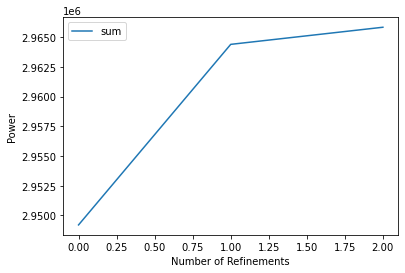

In [27]:
df.plot.line(x="refinements", y="sum")
plt.xlabel("Number of Refinements")
plt.ylabel("Power")